<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/1210_00_%ED%8A%B8%EB%9E%9C%EC%8A%A4%ED%8F%AC%EB%A8%B8%EB%AA%A8%ED%98%95_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hugging Face**

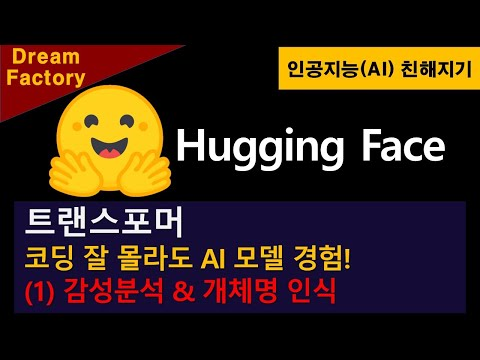

In [2]:
# prompt: 유튜브 불러와 상영하기 2 줄

from IPython.display import YouTubeVideo
YouTubeVideo('HwTaVeRzy5M')

## 1. 언어 번역 (Language Translation)
Transformer의 가장 기본적인 응용사례는 언어 번역입니다. Hugging Face 라이브러리를 사용하여 한 언어에서 다른 언어로 번역할 수 있습니다.

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# 영어에서 프랑스어 번역 모델
model_name = 'Helsinki-NLP/opus-mt-en-fr'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

text = "The future of AI is incredibly exciting."
inputs = tokenizer(text, return_tensors="pt", padding=True)
translated = model.generate(**inputs)
translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)

print(translated_text)  # 예상 출력: "L'avenir de l'IA est incroyablement excitant."


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

L'avenir de l'IA est incroyablement excitant.


## 2. 텍스트 생성 (Text Generation)
텍스트 생성에서는 특정 주제에 대해 연속된 텍스트를 생성할 수 있습니다. OpenAI의 GPT 모델을 사용하여 이를 수행할 수 있습니다.

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

prompt = "Artificial intelligence is transforming the world by"
inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(inputs.input_ids, max_length=50, num_return_sequences=1)

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Artificial intelligence is transforming the world by creating new ways to interact with the world around us.

The world is changing, and we need to change it.

We need to change the way we interact with the world around us.



## 3. 감정 분석 (Sentiment Analysis)
Transformer 모델을 사용하여 텍스트의 감정을 분석할 수 있습니다. 예를 들어 리뷰 데이터에서 긍정 또는 부정적인 감정을 분류하는 데 사용할 수 있습니다.

In [ ]:
from transformers import pipeline

# 감정 분석 파이프라인 생성
classifier = pipeline('sentiment-analysis')

text = "I love the new features of this product! It's amazing."
result = classifier(text)

print(result)  # 예상 출력: [{'label': 'POSITIVE', 'score': 0.99}]


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998862743377686}]


## 4. 요약 생성 (Text Summarization)
문서나 긴 텍스트에서 중요한 정보를 추출하여 요약하는 작업입니다. Hugging Face의 Bart 모델을 사용하여 긴 문서를 간단히 요약할 수 있습니다.

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

article = """
Artificial Intelligence (AI) is one of the most rapidly advancing fields in technology today.
With applications ranging from natural language processing to robotics, AI is transforming the way we live and work.
Recent advancements in deep learning and machine learning have pushed the boundaries of what is possible, creating new opportunities and challenges.
"""
inputs = tokenizer([article], max_length=1024, return_tensors="pt", truncation=True)
summary_ids = model.generate(inputs["input_ids"], max_length=50, min_length=25, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print(summary)  # 요약된 텍스트 출력


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Artificial Intelligence (AI) is one of the most rapidly advancing fields in technology. With applications ranging from natural language processing to robotics, AI is transforming the way we live and work.


## 5. 이미지 캡셔닝 (Image Captioning)
Transformer는 이미지와 텍스트 데이터를 결합하여 이미지에 대한 설명을 생성하는 데 사용할 수 있습니다. 이미지 캡셔닝 작업에는 ViT와 GPT-2 같은 모델을 조합하여 이미지 특징과 텍스트 생성 능력을 결합할 수 있습니다.

In [ ]:
from transformers import ViTFeatureExtractor, ViTModel, GPT2LMHeadModel, GPT2Tokenizer
from PIL import Image
import torch

# Image 모델과 텍스트 모델 준비
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
text_model = GPT2LMHeadModel.from_pretrained("gpt2")

# 이미지 불러오기
image = Image.open('/content/images (1).jfif')  # 이미지 파일 필요

# 이미지 특징 추출
inputs = feature_extractor(images=image, return_tensors="pt")
features = vit_model(**inputs).last_hidden_state

# 이미지 특징을 텍스트 모델에 입력
input_text = "This is an image of"
inputs = tokenizer(input_text, return_tensors="pt")
inputs_embeds = text_model.transformer.wte(inputs.input_ids)  # 텍스트 임베딩
combined_inputs = torch.cat((features[:, :inputs_embeds.size(1), :], inputs_embeds), dim=1)

# 텍스트 생성
outputs = text_model.generate(inputs_embeds=combined_inputs, max_length=30)
caption = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(caption)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


 a woman in a suit and a hat. The image is of a woman in a suit and a


## 6. 문자 분류하기(Text Classification)

In [ ]:
from transformers import pipeline

# Zero-shot-classification 파이프라인 사용하기
classifier = pipeline("zero-shot-classification")

# 예시 문장들
sentences = [
    "I love this product! It's amazing!",
    "The service was terrible, I am very disappointed.",
    "It was an average experience, nothing special."
]

# 가능한 레이블들 정의하기
labels = ["Positive statement", "Negative statement", "Neutral statement"]

# 문장 분류 실행하기
results = [classifier(sentence, candidate_labels=labels) for sentence in sentences]

# 결과 출력
for sentence, result in zip(sentences, results):
    print(f"Sentence: {sentence}")
    print(f"Label: {result['labels'][0]}, Score: {result['scores'][0]:.4f}\n")


No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Sentence: I love this product! It's amazing!
Label: Positive statement, Score: 0.9608

Sentence: The service was terrible, I am very disappointed.
Label: Negative statement, Score: 0.9606

Sentence: It was an average experience, nothing special.
Label: Neutral statement, Score: 0.7779



In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 뉴스 데이터셋 가져오기
newsgroups = fetch_20newsgroups(subset='all', categories=['rec.sport.baseball', 'sci.med', 'comp.graphics'])

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

# TF-IDF 벡터화 및 분류 파이프라인 구성
tfidf = TfidfVectorizer()
model = MultinomialNB()
pipe = make_pipeline(tfidf, model)

# 모델 학습
pipe.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = pipe.predict(X_test)

# 결과 출력
print(metrics.classification_report(y_test, y_pred, target_names=newsgroups.target_names))

# 예시 문장 분류
test_sentences = [
    "The game last night was incredible!",
    "New graphics cards are getting more powerful every year.",
    "Recent studies show a correlation between diet and health."
]

# 문장 분류 실행 및 결과 출력
test_predictions = pipe.predict(test_sentences)
for sentence, prediction in zip(test_sentences, test_predictions):
    print(f"Sentence: {sentence}")
    print(f"Predicted Category: {newsgroups.target_names[prediction]}\n")


                    precision    recall  f1-score   support

     comp.graphics       0.98      0.95      0.97       302
rec.sport.baseball       0.97      0.99      0.98       297
           sci.med       0.97      0.98      0.97       289

          accuracy                           0.97       888
         macro avg       0.97      0.97      0.97       888
      weighted avg       0.97      0.97      0.97       888

Sentence: The game last night was incredible!
Predicted Category: rec.sport.baseball

Sentence: New graphics cards are getting more powerful every year.
Predicted Category: rec.sport.baseball

Sentence: Recent studies show a correlation between diet and health.
Predicted Category: sci.med



In [ ]:
# 뉴스 데이터셋 가져오기
newsgroups = fetch_20newsgroups(subset='all', categories=['rec.sport.baseball', 'sci.med', 'comp.graphics'])

# Zero-shot-classification 파이프라인 사용하기
classifier = pipeline("zero-shot-classification")

# 가능한 레이블들 정의하기
labels = ['rec.sport.baseball', 'sci.med', 'comp.graphics']

# 테스트 데이터 예시 문장들
test_sentences = [
    "The game last night was incredible!",
    "New graphics cards are getting more powerful every year.",
    "Recent studies show a correlation between diet and health."
]

# 문장 분류 실행 및 결과 출력
for sentence in test_sentences:
    result = classifier(sentence, candidate_labels=labels)
    print(f"Sentence: {sentence}")
    print(f"Predicted Category: {result['labels'][0]}, Score: {result['scores'][0]:.4f}\n")


No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentence: The game last night was incredible!
Predicted Category: comp.graphics, Score: 0.4785

Sentence: New graphics cards are getting more powerful every year.
Predicted Category: comp.graphics, Score: 0.8236

Sentence: Recent studies show a correlation between diet and health.
Predicted Category: sci.med, Score: 0.5437



In [ ]:
# 테스트 데이터 예측
# 원래 test를 요약생성하여 classification 하는 것이 방법

y_pred_transformer = [classifier(text, candidate_labels=labels) for text in X_test[:10]]

In [ ]:
y_test[0:1]

array([0])

In [ ]:
# prompt: y_pred_transformer의 labels과 확률만 골라내서 읽어줘, 반복문내에서 y_test의 해당되는 원소의 lables  ['rec.sport.baseball', 'sci.med', 'comp.graphics']를 동시에 출력해줘

for i in range(len(y_pred_transformer)):
  print(f"Predicted Category: {y_pred_transformer[i]['labels'][0]}, Score: {y_pred_transformer[i]['scores']}")
  print(f"Actual Category: {newsgroups.target_names[y_test[i]]}")

Predicted Category: comp.graphics, Score: [0.4959161877632141, 0.448777973651886, 0.055305905640125275]
Actual Category: comp.graphics
Predicted Category: comp.graphics, Score: [0.5860941410064697, 0.33727025985717773, 0.07663557678461075]
Actual Category: comp.graphics
Predicted Category: comp.graphics, Score: [0.4989340603351593, 0.32142823934555054, 0.17963770031929016]
Actual Category: sci.med
Predicted Category: comp.graphics, Score: [0.43092113733291626, 0.3272210359573364, 0.24185782670974731]
Actual Category: rec.sport.baseball
Predicted Category: comp.graphics, Score: [0.4537046253681183, 0.4264949858188629, 0.11980041861534119]
Actual Category: sci.med
Predicted Category: comp.graphics, Score: [0.3757995069026947, 0.3240238130092621, 0.3001766800880432]
Actual Category: rec.sport.baseball
Predicted Category: comp.graphics, Score: [0.48670414090156555, 0.40101587772369385, 0.11227993667125702]
Actual Category: sci.med
Predicted Category: sci.med, Score: [0.4847826659679413, 0.

In [ ]:
y_pred_transformer

[{'sequence': "From: cormackj@access.digex.com (John Cormack)\nSubject: Re: VESA on the Speedstar 24\nOrganization: Express Access Online Communications, Greenbelt, MD USA\nLines: 8\nNNTP-Posting-Host: access.digex.net\nSummary: Speedstar 24X\nKeywords: VESA driver for Speedstar 24X\n\nI need a VESA driver for the Diamond Speedstar 24X that works. I've tried\nseveral and none work for the hicolor modes.\n\nJohn Cormack\nCormackj@access.digex.com\n\n\n\n",
  'labels': ['comp.graphics', 'sci.med', 'rec.sport.baseball'],
  'scores': [0.4959161877632141, 0.448777973651886, 0.055305905640125275]},
 {'sequence': "From: pes@hutcs.cs.hut.fi (Pekka Siltanen)\nSubject: Re: detecting double points in bezier curves\nNntp-Posting-Host: hutcs.cs.hut.fi\nOrganization: Helsinki University of Technology, Finland\nLines: 26\n\nIn article <1993Apr19.234409.18303@kpc.com> jbulf@balsa.Berkeley.EDU (Jeff Bulf) writes:\n>In article <ia522B1w165w@oeinck.waterland.wlink.nl>, ferdinan@oeinck.waterland.wlink.nl 

In [ ]:
# 결과 출력
print(metrics.classification_report(y_test[:10], y_pred_transformer, target_names=newsgroups.target_names))

## 7. 단어 추출(Tokenniing)

In [ ]:
from transformers import BertTokenizer

# BERT 모델의 사전 학습된 토크나이저를 불러옵니다.
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 토크나이징할 문장을 정의합니다.
text = "Transformers are very powerful for NLP tasks."

# 문장을 토크나이징하여 단어의 토큰으로 분할합니다.
tokens = tokenizer.tokenize(text)

# 결과 출력
print("Tokenized words:", tokens)

# 토큰을 ID로 변환하여 확인할 수도 있습니다.
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", token_ids)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokenized words: ['transformers', 'are', 'very', 'powerful', 'for', 'nl', '##p', 'tasks', '.']
Token IDs: [19081, 2024, 2200, 3928, 2005, 17953, 2361, 8518, 1012]
